### MTH00051 -- TUTORIAL 02 
## XÁC SUẤT VÀ XÁC SUẤT CÓ ĐIỀU KIỆN
## PHÂN PHỐI CỦA BIẾN NGẪU NHIÊN
---

### I. Xác suất và xác suất có điều kiện
 
 #### 1. Xác suất
 
 Để tính gần đúng xác suất của một biến cố $A$ liên quan đến thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau: thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$ và đếm số lần biến cố $A$ xảy ra, $m$. 
 
 Khi đó $f_A$ được gọi là tần suất của $A$: $$f_A = \frac{m}{N} $$ Khi $N$ đủ lớn, ta có $$ f_A \approx P(A)$$
Việc thực hiện lặp lại nhiều lần thí nghiệm $T$ có thể được mô phỏng (simulate) trên máy.

Lưu ý:
 * Chạy với $N$ đủ lớn thì tần suất sẽ xấp xỉ xác suất cần tính
 * Dấu hiệu nhận biết $N$ đủ lớn: khi $N$ nhỏ thì kết quả dao động mạnh (không ổn định, lúclớn lúc nhỏ), còn khi $N$ đủ lớn thì kết quả dao động ít hơn (ổn định, xêm xêm cùng bậc). Nhưng $N$ lớn quá thì tốn thời gian chạy
 * Mỗi lần chạy sẽ có kết quả khác nhau do ngẫu nhiên

In [6]:
# VD: Bốc ngẫu nhiên 3 viên bi trong hộp gồm 10 bi Đỏ và 20 bi Đen. 
# Tính xác suất bốc được cả 3 bi Đỏ trong các trường hợp:
# Bốc có hoàn lại
# Bốc không hoàn lại

red, black = 10, 20
total = red + black

# Bốc có hoàn lại
omega = pow(total, 3) # Vì bốc có hoàn lại nên số phần tử của không gian mẫu là 30^3 
A = pow(red, 3) # Gọi A là biến cố ``bốc được cả 3 bi Đỏ'' thì số kết quả thuận lợi cho A là 10^3
P_A = A/omega
print('Bốc có hoàn lại P(A) =', P_A)


# Bốc không hoàn lại
from operator import mul
from fractions import Fraction
from functools import reduce
def nCk(n,k):
    return int(reduce(mul, (Fraction(n-i, i+1) for i in range(k)), 1))

omega = nCk(30, 3) # Vì bốc không hoàn lại và 'không quan tâm thứ tự' 
A = nCk(10, 3) # Gọi $A$ là biến cố 'bốc được cả 3 bi Đỏ'
P_A = A/omega
print('Bốc không hoàn lại P(A) =', P_A)

Bốc có hoàn lại P(A) = 0.037037037037037035
Bốc không hoàn lại P(A) = 0.029556650246305417


In [7]:
# Mô phỏng
import numpy as np
box = ['R']*10 + ['B']*20
N = 500 # thay đổi N lớn để được kết quả tốt hơn

# Bốc có hoàn lại
def simulation():
    ''' hàm thực hiện bốc bi và kiểm tra biến cố "bốc được cả 3 bi Đỏ" '''
    samples = np.random.choice(box, size = 3, replace = True)
    return all([s == 'R' for s in samples])
def cal_prob(N):
    ''' Hàm thực hiện N lần thí nghiệm bốc bi và tính tần suất của biến cố '''
    return sum([simulation() for i in range(N)])/N
print('Bốc có hoàn lại P(A) =', cal_prob(N)) 

# Bốc không hoàn lại
def simulation():
    ''' hàm thực hiện bốc bi và kiểm tra biến cố "bốc được cả 3 bi Đỏ" '''
    samples = np.random.choice(box, size = 3, replace = False)
    return all([s == 'R' for s in samples])
def cal_prob(N):
    ''' Hàm thực hiện N lần thí nghiệm bốc bi và tính tần suất của biến cố '''
    return sum([simulation() for i in range(N)])/N
print('Bốc không hoàn lại P(A) =', cal_prob(N)) 

Bốc có hoàn lại P(A) = 0.052
Bốc không hoàn lại P(A) = 0.032


  #### 2. Xác suất có điều kiện
  
  Để tính gần đúng xác suất có điều kiện của một biến cố $B$ khi biết biến cố $A$ đã xảy ra trong thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau: thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$, đếm số lần biến cố $A$ xảy ra, m, và trong các lần $A$ xảy ra thì đếm số lần $B$ cũng xảy ra, p. 
  
  Khi đó $f(B|A)$ được gọi là tần suất của $B$ trên $A$: $$f(B|A)=\frac{p}{m}$$
  Khi $N$ đủ lớn, ta có $f(B|A)$ ~= $P(B|A)$.

In [8]:
# VD: Rút ngẫu nhiên lần lượt 3 lá bài (không hoàn lại) từ bộ bài Tây 52 lá. Tính xác suất:
# Lá bài thứ hai là bích khi biết lá bài thứ nhất là bích (P_2)
# Lá bài thứ ba là bích khi biết cả hai lá bài đầu là bích (P_3)
# Cả 3 lá bài là bích (P_all)

P_A1 = 13/52 # Ai là biến cố ``lá bài rút lần thứ i là bích''
P_2 = 12/51 # P(A2|A1): Khi lá bài rút lần thứ nhất là bích thì lúc rút lá bài thứ hai ta có bộ bài còn 51 lá trong đó có 12 lá bích
P_3 = 11/50 # P(A3|A1 intersection A2)
P_all = P_A1 * P_2 * P_3 # P(A1 intersection A2 intersection A3) = P(A1)*P(A2|A1)*P(A3|A1 intersection A2)
P_2, P_3, P_all

(0.23529411764705882, 0.22, 0.012941176470588235)

In [9]:
# Mô phỏng
from itertools import product
suits =['Heart', 'Club', 'Spade', 'Diamond']
values = range(13)
deck_of_cards = {i:j for i,j in enumerate(list(product(values, suits)))}
N = 50000

def throw(N):
    count = [0, 0, 0]
    for i in range(N):
        samples = np.random.choice([*deck_of_cards], size = 3, replace = False)
        count[0] += deck_of_cards[samples[0]][1] == 'Diamond'
        count[1] += all([True if deck_of_cards[i][1] == 'Diamond' else False for i in samples[:2]])
        count[2] += all([True if deck_of_cards[i][1] == 'Diamond' else False for i in samples])
    return count

count = throw(N)
count[1]/count[0] if count[0] else 0, count[2]/count[1] if count[1] else 0, count[2]/N

(0.23818298349623457, 0.21560713084426505, 0.01282)

### II. Phân phối biến ngẫu nhiên
#### 1. Phân phối của biến ngẫu nhiên rời rạc
Hàm khối lượng xác suất  (probability mass function, pmf), hoặc gọn hơn là hàm xác suất (probability function, pf), xác định hoàn toàn phân phối của biến ngẫu nhiên (b.n.n) rời rạc. 

Để tính gần đúng hàm xác suất của một b.n.n rời rạc $X$ liên quan đến thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau: thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$ và tính các tần xuất $p_x$ của biến cố $X$ nhận giá trị $x$. 

Khi $N$ đủ lớn, ta có $p_x$ ~= $P(X=x)$.

In [99]:
# Phân phối nhị thức (Binomial)
# Bốc ngẫu nhiên 5 viên bi trong hộp gồm 4 bi Đỏ và 6 bi Đen. 
# Gọi X là số bi đỏ bốc được, tìm phân phối của X trong trường hợp bốc có hoàn lại.

p = 4/(4+6)
print(p)
# Với X là số bi Đỏ bốc được trong n=5 lần bốc thì X~Binomial(n,p) = Binomial(5,0.4).
# Do đó, xác suất để bốc được 0 <= k <= 5 bi Đỏ là: 
# P(X=k) =  C_n^k * p^k * (1-p)^(n-k)

n = 5
P_Xk = []
for k in range(n+1):
    P_Xk.append(nCk(n, k) * p**k * (1-p)**(n-k))
print(P_Xk)

# Thu vien numpy
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html
print(sum(np.random.binomial(n, p, 10000) == 0)/10000)

# Thu vien scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
from scipy.stats import binom
print(binom.pmf(k = range(n+1), n=n, p=p))

0.4
[0.07775999999999998, 0.2592, 0.3456, 0.23040000000000005, 0.07680000000000002, 0.010240000000000003]
0.0753
[0.07776 0.2592  0.3456  0.2304  0.0768  0.01024]


In [78]:
# Mô phỏng
def pf(N, n):
    box = 4*['R'] + 6*['B']
    result = np.array([0]* (n+1))
    for i in range(N):
        samples = np.random.choice(box, size=n, replace=True)
        result[sum(samples=='R')] += 1
    return (result/N)

N, n = 10000, 5
pf(N, n)

array([0.0768, 0.2596, 0.3483, 0.2303, 0.0753, 0.0097])

[0.023809523809523808, 0.23809523809523808, 0.47619047619047616, 0.23809523809523808, 0.023809523809523808, 0.0]


(0, 5)

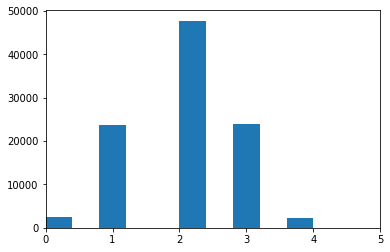

In [117]:
# Phân phối Siêu bội
# Tương tự bài trên nhưng trong trường hợp bốc không hoàn lại.

# Hộp có R=4 viên bi Đỏ và B=6 viên bi Đen. 
# Bốc không hoàn lại n=5 viên. 
# Gọi X là số bi Đỏ bốc được thì X~Hypergeometric(n,A,B).
# Do đó, xác suất để bốc được 0<= k<= 5 bi Đỏ là:
# P(X=k) = C_R^k * C_B^{n-k} / C_{R+B}^n

n, R, B = 5, 4, 6
P_Xk = []
for k in range(n+1):
    P_Xk.append((nCk(R, k) * nCk(B, n-k))/nCk(R+B, n))
print(P_Xk)

# Thu vien numpy
# https://docs.scipy.org/doc/numpy-1.15.4/reference/generated/numpy.random.hypergeometric.html
import matplotlib.pyplot as plt
plt.hist(np.random.hypergeometric(R, B, n, 100000))
plt.xlim([0, 5])

In [82]:
# Mô phỏng
def pf(N, n):
    box = 4*['R'] + 6*['B']
    result = np.array([0]* (n+1))
    for i in range(N):
        samples = np.random.choice(box, size=n, replace=False)
        result[sum(samples=='R')] += 1
    return (result/N)

N, n = 10000, 5
pf(N, n)

array([0.0246, 0.239 , 0.4733, 0.2397, 0.0234, 0.    ])

#### 2. Phân phối xác suất liên tục
 Hàm mật độ xác suất (probability density function, pdf) xác định hoàn toàn phân phối của b.n.n liên tục. 
 
 Để "tính gần đúng” hàm mật độ xác suất $f_X$ của một b.n.n liên tục $X$ liên quan đến thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau: thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$ và dựng histogram $h_X$ của các giá trị mà $X$ nhận. 
 
 Khi $N$ đủ lớn, ta có $h_X$ ~= $f_X$

(array([ 9965., 10009.,  9968., 10060.,  9955., 10124.,  9991.,  9922.,
        10064.,  9942.]),
 array([0.50000672, 0.55000597, 0.60000522, 0.65000447, 0.70000373,
        0.75000298, 0.80000223, 0.85000148, 0.90000073, 0.94999999,
        0.99999924]),
 <a list of 10 Patch objects>)

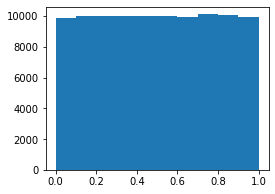

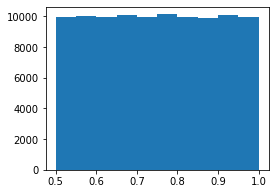

In [147]:
# Phân phối đều
# Chọn ngẫu nhiên một điểm trên một thanh có chiều dài 1 đơn vị,
# cắt tại điểm đó thành hai đoạn và giữ lại đoạn dài hơn. 
# Tìm phân phối của chiều dài đoạn giữ lại.

def simulation(N):
    return [max(i, 1-i) for i in np.random.uniform(0,1, size = N)]

import matplotlib.pyplot as plt
# ngẫu nhiên một điểm trên một thanh có chiều dài 1 đơn vị
plt.figure(figsize=(4,3))
plt.hist(np.random.uniform(0,1,100000))

# cắt tại điểm đó thành hai đoạn và giữ lại đoạn dài hơn
plt.figure(figsize=(4,3))
plt.hist(simulation(100000))

# => Từ histogram ta kiểm chứng là Y ~= Uniform(0.5,1).

pdf(160) = 7.26683020629853e-07
pdf(< 120) = 0.9380320971636288
pdf(> 120) = 0.061967902836371214
10 random people: [ 82.83058738  91.16696485 102.36785791  93.83531898  80.41087204
  97.73360824 126.39080133 103.42315169 112.5629997  100.65932639]


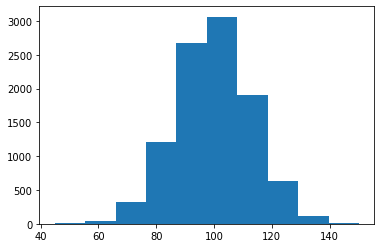

In [186]:
# Trong một quần thể, chúng ta biết áp suất máu trung bình là 100 mmHg và độ lệch chuẩn là 13 mmHg. 
# Cho biết có bao nhiêu người trong quần thể này có áp suất máu bằng hoặc cao hơn 120 mmHg?

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm

mu, sd = 100, 13 # mean and standard deviation
d = norm.rvs(loc=100, scale=13, size=10000)
plt.hist(d)

# xác xuất một người có áp xuất máu 160
print('pdf(160) =', norm.pdf(160, loc=100, scale = 13))

print('pdf(< 120) =', norm.cdf(120, loc=100, scale = 13))
print('pdf(> 120) =', 1 - norm.cdf(120, loc=100, scale = 13))
print('10 random people:', norm.rvs(loc=100, scale=13, size=10))